# Исследование в интернет-магазине «Стримчик»

Цель исследования - нужно выявить определяющие успешность игры закономерности.

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


# 1. Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
steam = pd.read_csv('/datasets/games.csv')

In [3]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
display(steam)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Описание данных 

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [5]:
steam.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

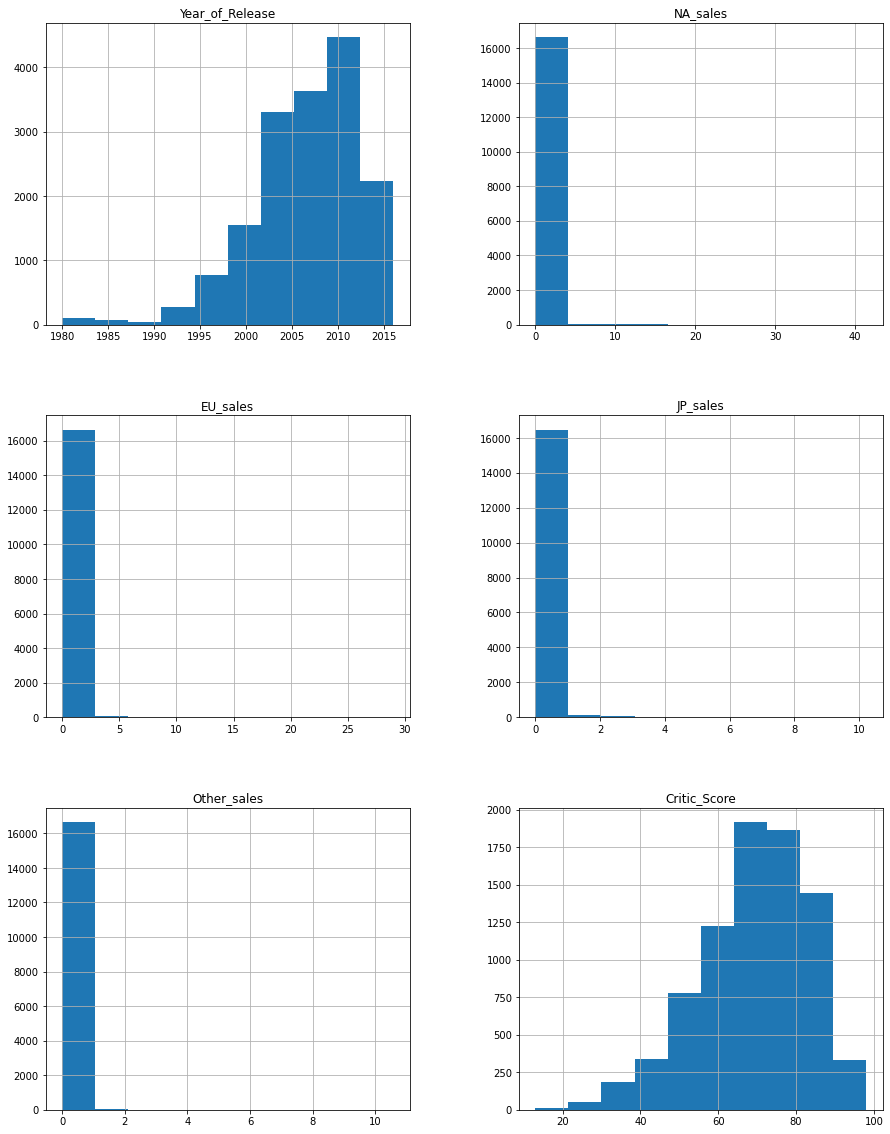

In [6]:
steam.hist(figsize=(15, 20))

In [7]:
steam.duplicated().sum()

0

# 2.Предобработка данных

# 2.1.Замена названия столбцов

In [8]:
steam = steam.rename(columns = {'Year_of_Release':'year_of_release',
                            'NA_sales':'na_sales',
                            'EU_sales':'eu_sales',
                            'JP_sales':'jp_sales',  
                            'Other_sales':'other_sales', 
                            'Critic_Score':'critic_score',
                            'JP_sales':'jp_sales',
                            'Name':'name',
                            'Platform':'platform',
                            'Genre':'genre',
                            'User_Score':'user_score',
                            'Rating':'rating',               
                               })

In [9]:
steam.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

# 2.2

In [10]:
steam.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
steam.dropna(subset=['name'], inplace=True)
steam['name'].isna().sum()

0

In [12]:
steam.dropna(subset=['genre'], inplace=True)
steam['genre'].isna().sum()

0

In [13]:
steam.dropna(subset=['year_of_release'], inplace=True)
steam['year_of_release'].isna().sum()

0

In [14]:
steam[steam['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [15]:
steam[steam['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
steam['year_of_release'] = steam['year_of_release'].astype('Int64')
steam['user_score'] = steam['user_score'].replace('tbd', np.nan, regex=True)
steam['user_score'] = steam['user_score'].astype(float)

In [17]:
steam.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [18]:
display(steam)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Год есть год так лечге на него смотреть

Обработаем пропуски

In [19]:
steam.sort_values(by = 'year_of_release')['year_of_release'].unique()  

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Length: 37, dtype: Int64

In [20]:
for i in steam[steam['year_of_release'].isnull() == True].index:  
    steam['year_of_release'][i] = steam.loc[steam['name'] == steam['name'][i], 'year_of_release'].max()

In [21]:
steam['year_of_release'].isna().sum()

0

Единственное где можно убарть пропуски это в годе релиза так как есть одни и теже игры на других платформах

In [22]:
steam['user_score'] = steam['user_score'].replace('tbd', np.nan, regex=True)

TBD это (to be determined = будет определено) оценка еще не вышла.

Еще так пишут когда не понятно когда выйдет игра

In [23]:
steam['global_sales'] = steam['na_sales'] + steam['eu_sales'] + steam['jp_sales'] + steam['other_sales']

In [24]:
steam

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


У некоторых игр нет даты релиза на одной платформе на другой есть.



In [25]:
steam['rating'] = steam['rating'].fillna('unknown')

In [26]:
steam['user_score'] = steam['user_score'].fillna(-0.1)

In [27]:
steam['critic_score'] = steam['critic_score'].fillna(-0.1)

In [28]:
steam['user_score'] = steam['user_score']*10

Пропуски в рейтингах заменил на значение '-0.1'. Заменил на рейтинг которого нет.Так как там боло 50 проц пропусков легче заменить рейтинг

Пропуски в возрастной категории заменил на 'unknown'. ESRB это рейнтинг для США и Канады и для других регионов они не подоходят.

Пропуски в названии их удалил. Было всего два пропуска поэтому легче удалить

Пропуски в годах тоже удалили(их мало)




# 3. Проведите исследовательский анализ данных

# 3.1. Количество выпущенных игр

Text(0, 0.5, 'Количество выпущенных игр')

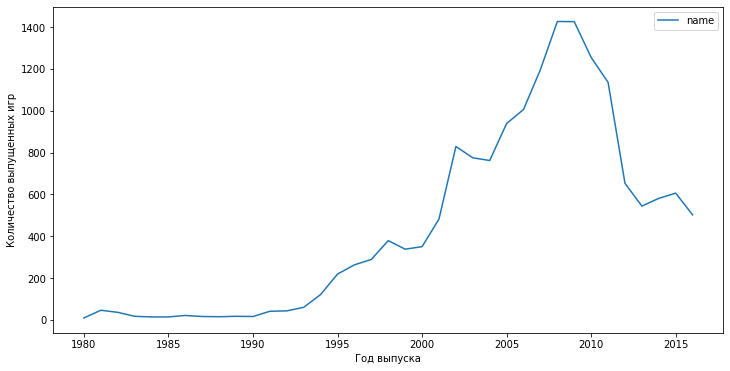

In [30]:
games_per_year = steam.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize = (12,6))
sns.lineplot(data = games_per_year)
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")

С начала 95 года начался рост. В 2004 был сильный скачек и после 2005 года бурных рост

# 3.2. Продажи платформ

# платформы с наибольшими суммарными продажами 

Text(0, 0.5, 'Продажи')

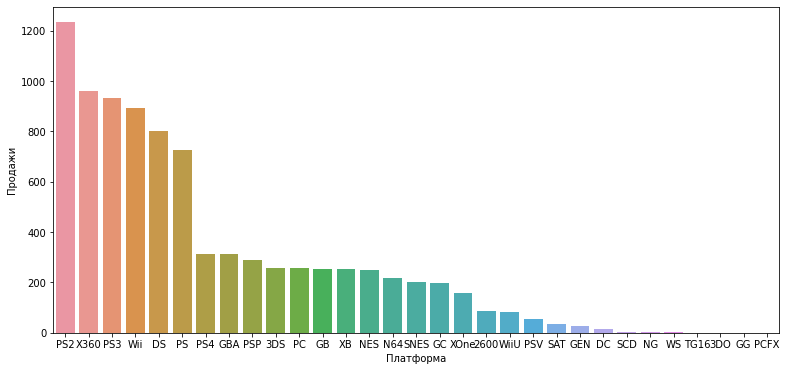

In [31]:
sales_platform = steam.pivot_table(index='platform', values='global_sales', aggfunc='sum').sort_values(by='global_sales', ascending=False)

plt.figure(figsize = (13,6))
sns.barplot(x = sales_platform.index, y = sales_platform['global_sales'])
plt.xlabel("Платформа")
plt.ylabel("Продажи")

# характерный срок появляются новые и исчезают старые платформы

Text(0, 0.5, 'Продажи')

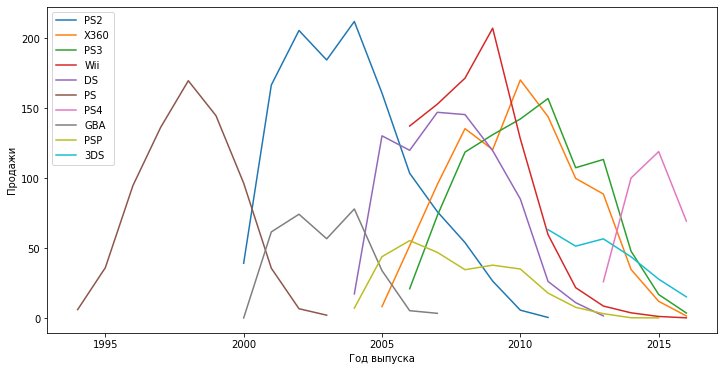

In [32]:
def year_sale_platform(name, data):
    return steam[(steam['platform']==name) & (steam['year_of_release']>1990)].pivot_table(
        index='year_of_release', values='global_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

top_platforms = steam.pivot_table(
    index='platform', values='global_sales', aggfunc='sum').sort_values(by='global_sales', ascending=False).head(10)

top_platforms = top_platforms.reset_index().rename_axis(None, axis=1)


plt.figure(figsize=(12,6))


for i in list(top_platforms['platform']):
    sns.lineplot(data=year_sale_platform(i,steam)['global_sales'], label=i)
    plt.legend()
plt.xlabel("Год выпуска")
plt.ylabel("Продажи")    

Игровая платформа живет примерно 7 лет. Самые продаваемые платформы Sony Play Station, Xbox, Nintendo.


# данные за соответствующий актуальный период

In [33]:
actual_years = (steam['year_of_release'] > 2012) & (steam['year_of_release'] <= 2016)
actual_games = steam.loc[actual_years]
actual_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-0.1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-0.1,-1.0,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-0.1,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-0.1,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-0.1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-0.1,-1.0,unknown,0.01


In [34]:
actual_games['platform']

16        PS3
23       X360
31        PS4
33        3DS
42        PS4
         ... 
16703     PSV
16707     PSV
16710     PS3
16712     PSV
16714     PSV
Name: platform, Length: 2233, dtype: object

Text(0, 0.5, 'Продажи')

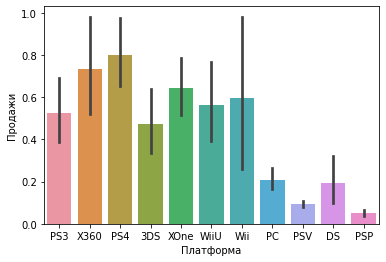

In [35]:
sns.barplot(data = actual_games, x="platform", y="global_sales")
plt.xlabel("Платформа")
plt.ylabel("Продажи")

По продажам лидируют PS4, X360, PS3, XONE, Wii

Растут продажи  PS4, XONE, WiiU это потенциально прибыльные платформы

У остальных продажи падают

In [36]:
t_platforms = actual_games[actual_games['platform'].isin(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV', 'DS', 'PSP'])]

# ящик с усами

(0.0, 1.75)

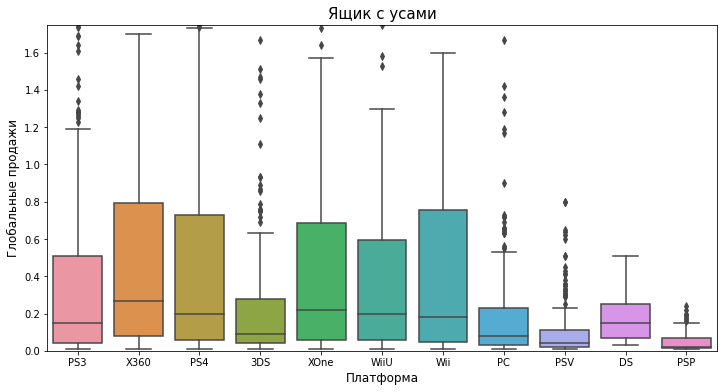

In [37]:
plt.figure(figsize = (12,6))
sns.boxplot(data = t_platforms, x ='platform', y ='global_sales')
plt.title('Ящик с усами', fontsize = 15)
plt.xlabel('Платформа', fontsize = 12)
plt.ylabel('Глобальные продажи', fontsize = 12)
plt.ylim([0, 1.75])

Топ продаж это Майкрософт, Sony, Nintendo. PS3 значительно проседает по сравнению с X360, а PS4 И XboxONe практически равны по продажам и от них не отстает Nintendo. 

# как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [38]:
data_user = actual_games[actual_games['user_score']>=0] 

In [39]:
data_critic = actual_games[actual_games['critic_score']>=0] 

In [40]:
station3u = data_user[data_user['platform']=='PS3'] 
station3c = data_critic[data_critic['platform']=='PS3'] 

Корееляция между оценками критиков и продажам нелинейная и умеренная

Корееляция между оценками пользователей и продажам нелинейная и слабая

In [45]:
xboxu = data_user[data_user['platform']=='X360']
xboxc = data_critic[data_critic['platform']=='X360']
xboneu = data_user[data_user['platform']=='XOne']
xbonec = data_critic[data_critic['platform']=='XOne']
station4u = data_user[data_user['platform']=='PS4'] 
station4c = data_critic[data_critic['platform']=='PS4'] 
dsu = data_user[data_user['platform']=='3DS']
dsc = data_critic[data_critic['platform']=='3DS']
pccu = data_user[data_user['platform']=='PC'] 
pccc = data_critic[data_critic['platform']=='PC'] 

In [46]:
print(len(data_critic[data_critic['critic_score']>=0]))
print(len(data_user[data_user['user_score']>=0]))

991
1192


In [47]:
data_user

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,26.0,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,26.0,M,9.36
...,...,...,...,...,...,...,...,...,...,...,...,...
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,-0.1,66.0,E,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,85.0,E,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,-0.1,51.0,E10+,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,67.0,unknown,0.01


In [48]:
station3c['critic_score'].corr(station3c['global_sales'])

0.3342853393371919

In [49]:
station3u['user_score'].corr(station3u['global_sales'])

0.0023944027357567176

Корееляция между оценками критиков и продажам нелинейная и умеренная

Корееляция между оценками пользователей и продажам нелинейная и слабая

In [50]:
xboxu['user_score'].corr(xboxu['global_sales'])

-0.011742185147181344

In [51]:
xboxc['critic_score'].corr(xboxc['global_sales'])

0.3503445460228664

xbox
Корееляция между оценками критиков и продажам нелинейная и умеренная

Корееляция между оценками пользователей и продажам нелинейная и умеренная

In [52]:
xboneu['user_score'].corr(xboneu['global_sales'])

-0.06892505328279411

In [53]:
xbonec['critic_score'].corr(xbonec['global_sales'])

0.4169983280084017

xbone
Корееляция между оценками критиков и продажам отрицательная и заметная

Корееляция между оценками пользователей и продажам нелинейная и умеренная

In [54]:
station4u['user_score'].corr(station4u['global_sales'])

-0.03195711020455641

In [55]:
station4c['critic_score'].corr(station4c['global_sales'])

0.40656790206178095

station4
Корееляция между оценками критиков и продажам отрицательная и слабая

Корееляция между оценками пользователей и продажам нелинейная и умеренная

In [56]:
dsu['user_score'].corr(dsu['global_sales'])

0.24150411773563002

In [57]:
dsc['critic_score'].corr(dsc['global_sales'])

0.3570566142288103

ds
Корееляция между оценками критиков и продажам нелинейная и слабая

Корееляция между оценками пользователей и продажам нелинейная и умеренная

In [58]:
pccu['critic_score'].corr(pccu['global_sales'])

0.19856260802311348

In [59]:
pccc['user_score'].corr(pccc['global_sales'])

-0.0923956992296861

pcc
Корееляция между оценками критиков и продажам нелинейная и слабая

Корееляция между оценками пользователей и продажам отрицательная и высокая

Различия между платформами не большие. Оценки и продажи не сильно зависят от критиков и оценок пользователей.

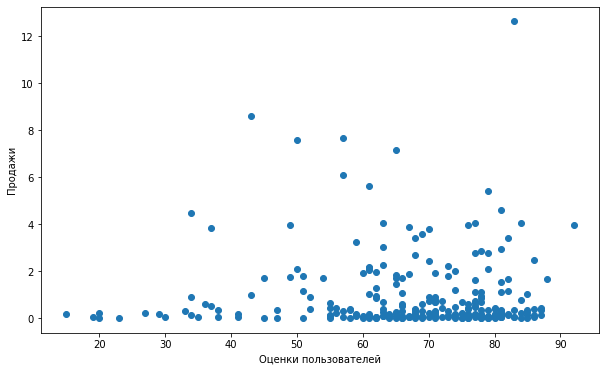

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = station4u['user_score'], y = station4u['global_sales'])
plt.xlabel("Оценки пользователей")
plt.ylabel("Продажи")

plt.show()

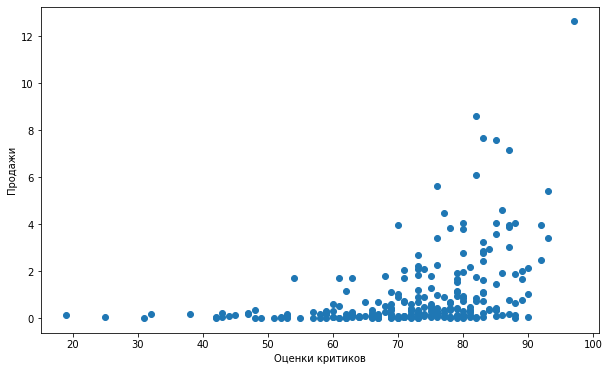

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = station4c['critic_score'], y = station4c['global_sales'])
plt.xlabel("Оценки критиков")
plt.ylabel("Продажи")

plt.show()

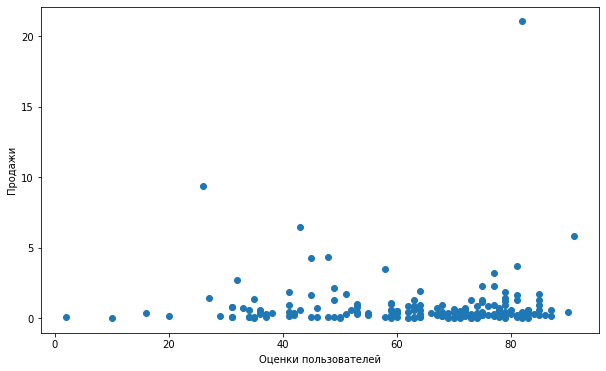

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = station3u['user_score'], y = station3u['global_sales'])
plt.xlabel("Оценки пользователей")
plt.ylabel("Продажи")

plt.show()

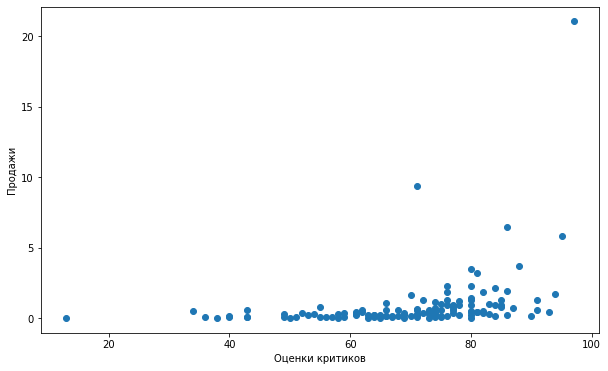

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = station3c['critic_score'], y = station3c['global_sales'])
plt.xlabel("Оценки критиков")
plt.ylabel("Продажи")

plt.show()

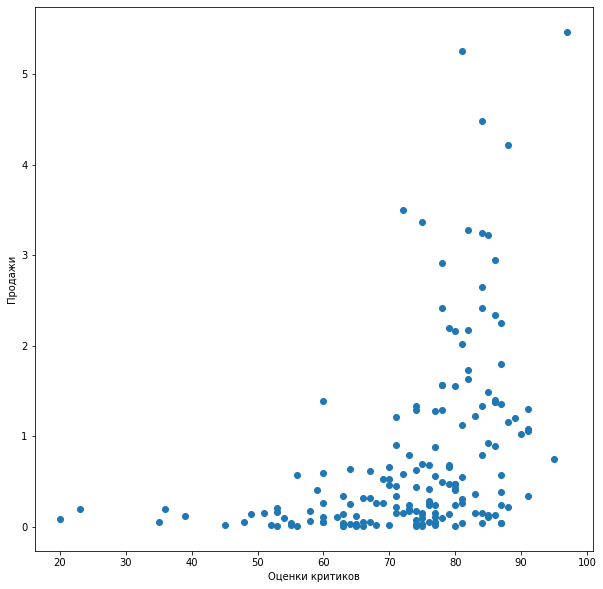

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x = xbonec['critic_score'], y = xbonec['global_sales'])
plt.xlabel("Оценки критиков")
plt.ylabel("Продажи")

plt.show()

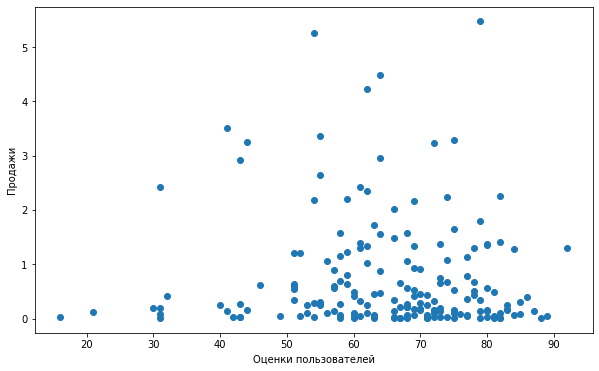

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = xboneu['user_score'], y = xboneu['global_sales'])
plt.xlabel("Оценки пользователей")
plt.ylabel("Продажи")

plt.show()

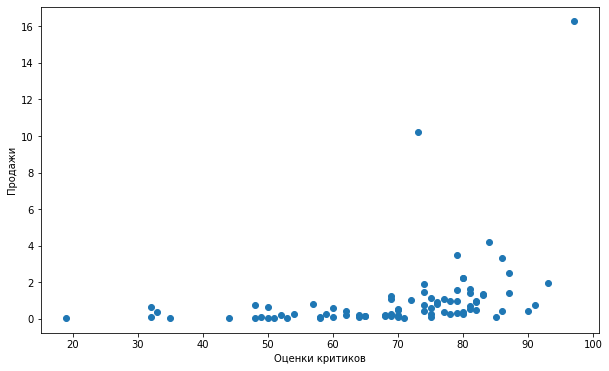

In [66]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = xboxc['critic_score'], y = xboxc['global_sales'])
plt.xlabel("Оценки критиков")
plt.ylabel("Продажи")

plt.show()

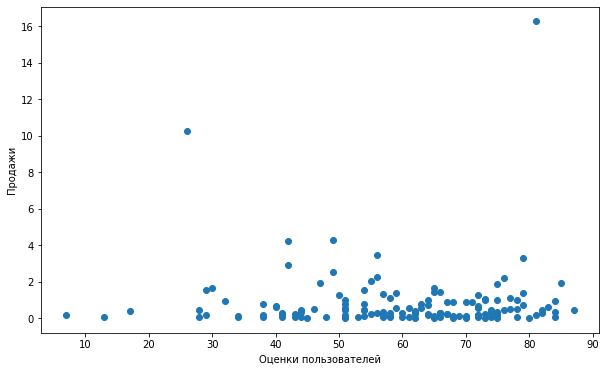

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = xboxu['user_score'], y = xboxu['global_sales'])
plt.xlabel("Оценки пользователей")
plt.ylabel("Продажи")

plt.show()

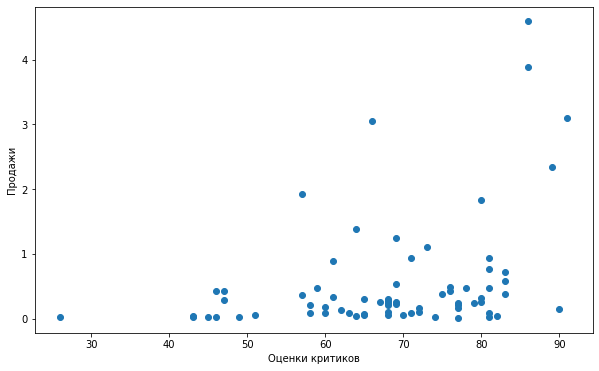

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = dsc['critic_score'], y = dsc['global_sales'])
plt.xlabel("Оценки критиков")
plt.ylabel("Продажи")

plt.show()

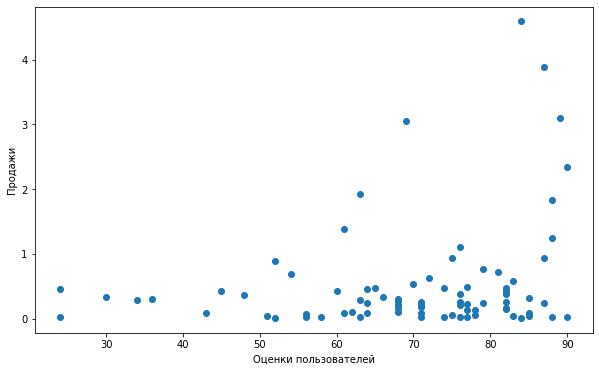

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = dsu['user_score'], y = dsu['global_sales'])
plt.xlabel("Оценки пользователей")
plt.ylabel("Продажи")

plt.show()

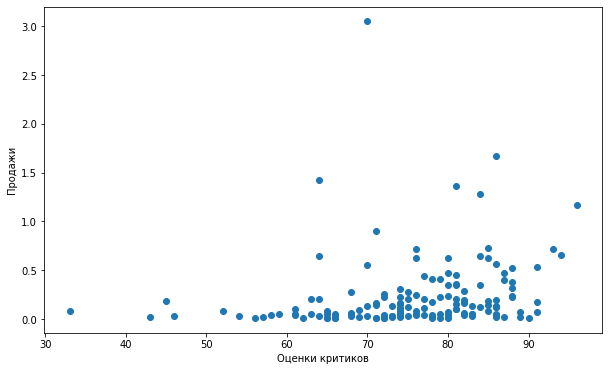

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = pccc['critic_score'], y = pccc['global_sales'])
plt.xlabel("Оценки критиков")
plt.ylabel("Продажи")

plt.show()

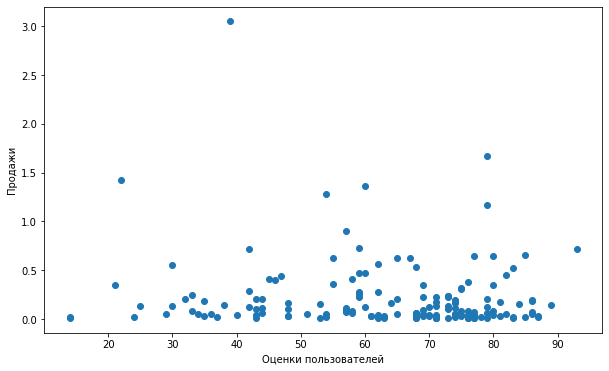

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = pccu['user_score'], y = pccu['global_sales'])
plt.xlabel("Оценки пользователей")
plt.ylabel("Продажи")

plt.show()

Зависимость от оценки критиков появляется только для оценок больше 60, с ростом оценки увеличивается объем продаж. 

Оценка пользователей не оказывает влияние на продажи

In [72]:
tier_genre = actual_games.pivot_table(index='genre', values='global_sales', aggfunc='median').sort_values(by='global_sales', ascending=False)
tier_genre = tier_genre.reset_index().rename_axis(None, axis=1)
tier_genre

,genre,global_sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


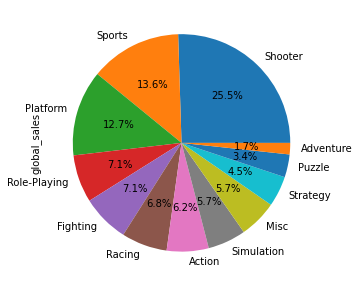

In [73]:
data = (actual_games.pivot_table(index='genre', aggfunc='median').sort_values('global_sales', ascending=False))
data.plot(kind='pie', y='global_sales',autopct='%1.1f%%', figsize=(10, 5), legend=False).set(label=data.index)
plt.show()

Самые прибыльние жанры это  шутеры, спорт, платформеры.
Эти жанры расчитаны на массового игрока и поэтому они в топах продаж.

Жанры выделяются с высокими и низкими продажами тем, что жанры с низкими продажами больше ориентируются на игроков своей ниши и не рассчитывают на высокий охват.

# 4. Составьте портрет пользователя каждого региона

In [74]:
def plot_top_sales_by_region_barplot(actual_games, column, region, n=5):
    data = (actual_games
            .pivot_table(index=column, values=region, aggfunc='sum')
            .sort_values(region, ascending=False)
            .head(8)).reset_index()
    sns.set_color_codes("pastel")
    sns.barplot(y=data[column], x=data[region], data=data, label="sales")
    sns.set_color_codes("muted")
    plt.show()
def plot_top_sales_by_region_pie(steam, column, region, n=5):
    data = (actual_games
            .pivot_table(index=column, values=region, aggfunc='sum')
            .sort_values(region, ascending=False)
            .head(7))
    data.plot(kind='pie', y=region,autopct='%1.0f%%', figsize=(10, 5), legend=True).set(label=data.index)
    plt.show()

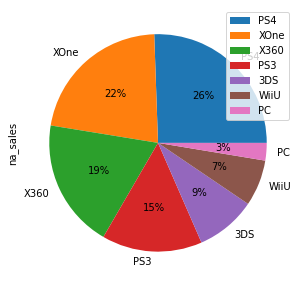

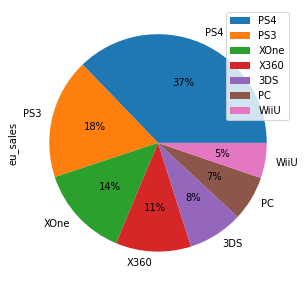

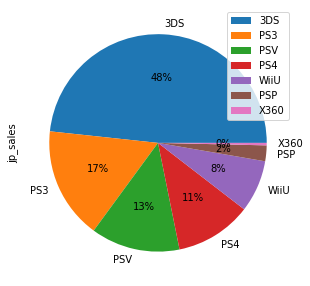

In [75]:
plot_top_sales_by_region_pie(actual_games, 'platform', region = 'na_sales')
plot_top_sales_by_region_pie(actual_games, 'platform', region = 'eu_sales')
plot_top_sales_by_region_pie(actual_games, 'platform', region = 'jp_sales')

На американском рынке XBOX делит с SONY рынок, а на европейском SONY имеет большую популярность. Отдельно стоит Япония, там доминирует Nintendo.

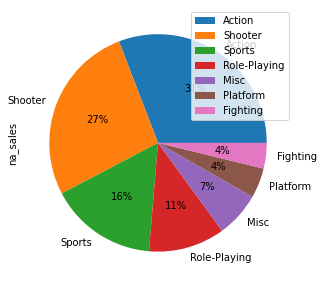

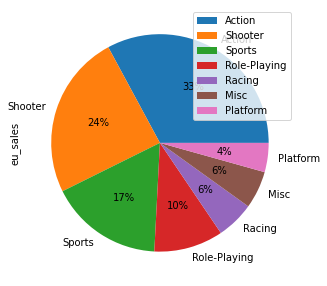

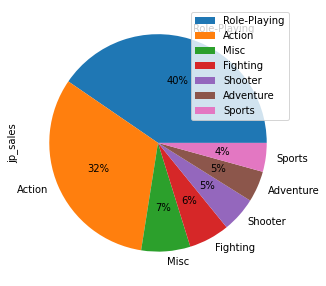

In [76]:
plot_top_sales_by_region_pie(actual_games, 'genre', region = 'na_sales')
plot_top_sales_by_region_pie(actual_games, 'genre', region = 'eu_sales')
plot_top_sales_by_region_pie(actual_games, 'genre', region = 'jp_sales')

На европейском и американском рынке одинаковые предподчтения в жанрах. 

В Японии РП заниемает практически половину рынка. Разница в культуре Японии и какие там популярные платформы.



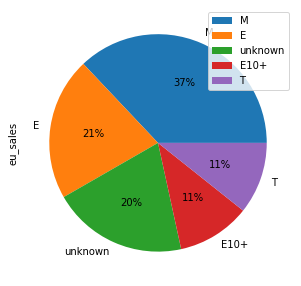

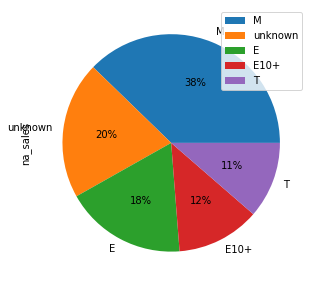

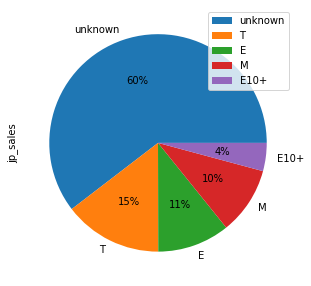

In [77]:
plot_top_sales_by_region_pie(actual_games, 'rating', region = 'eu_sales')
plot_top_sales_by_region_pie(actual_games, 'rating', region = 'na_sales')
plot_top_sales_by_region_pie(actual_games, 'rating', region = 'jp_sales')

Европейский и американский рынки они похожи по рейтингу, но в европе свои рейтинги.

Японский рынок про их рейтинги мы ничего не знаем.

ERSB влияет на продажи. Половина игр выскается с рейтонгом Everyone. Разработчики стараются выпускать игры с самым вегетарианским рейтингом, чтобы покупатели всех возрастов могли купить их продукт и это прямо влияет на продажи.

В отдельных регионах нету разницы.

# 5. Проверим гипотезы

# Гипотеза что средние пользовательские рейтинги платформ Xbox One и PC одинаковые если нулевая гипотеза: одинаковые, а если альтернативная гипотеза: различаются

In [79]:
xone = actual_games[(actual_games['platform']=='XOne') & (actual_games['year_of_release']>2012)]['user_score']
pc = actual_games[(actual_games['platform']=='PC') & (actual_games['year_of_release']>2012)]['user_score']
xone.mean()

47.78947368421053

In [80]:
pc.mean()

51.23809523809524

In [81]:
alpha = .05

results = st.ttest_ind(xone.dropna(), pc.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.23818439610083386
Не получилось отвергнуть нулевую гипотезу


Вывод: что альтернативная гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC разные, отвергается.

# Гипотеза что средние пользовательские рейтинги жанров Action и Sports разные.

Одинаковые если нулевая гипотеза: одинаковые средние пользовательские рейтинги

Альтернативная гипотеза: различаются рейтинги различаются

In [82]:
action = actual_games[(actual_games['genre']=='Action') & (actual_games['year_of_release']>2012)]['user_score']
sports = actual_games[(actual_games['genre']=='Sports') & (actual_games['year_of_release']>2012)]['user_score']

In [83]:
sports.mean()

38.91121495327103

In [84]:
action.mean()

34.231070496083554

In [85]:
alpha = .05

results = st.ttest_ind(action.dropna(), sports.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.043121621932646084
Отвергаем нулевую гипотезу


Вывод: что на имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

Везды было в задачах 0.05 я и тут применил

# 6. Общий вывод

Для успешной продажи игры требуется знание региона где будет продаваться игра, платформа на которой будут играть, возрастной рейтинг и жанр игры.

Для Евройпейского рынка подойдут жанры экшн, спорт и шутеры. Возрастной рейтинг для всех или тот рейтинг в который смогут играть несовершенолетние лица. Основной платформой будет Sony Playstaion рызных поколенийи меньше Xbox. Лучше всего продавать игры на Sony Playstation 4

Для Американского рынка подойдут жанры экшн, спорт и шутеры.Возрастной рейтинг для всех или тот рейтинг в который смогут играть несовершенолетние лица(рейтинг сложно вычеслить нет данных сместного рейтинга). Также как и в Евро рынке. Но амер рынке популярнее Xbox, но при этом Сони и Майкрософт имеют сильную конкуренцию между собой. Лучше всего продавать игры на Sony Playstation 4 и XboxONE.

Для Японского рынка подойдут жанр Role Play. Возрастной рейтинг сложно вычеслить нет данных сместного рейтинга. Основной платформой будет приставки от Nintendo  а дальше SONY. Лучше всего продавать игры на Nintendо.

За весь период платформ самые популярные оказались: Sony Playstation 2, Xbox 360, Sony Playstation 3, Nintendo, Sony Playstation.

Cредняя продолжительность жизни игровой приставки составляет порядка 6-7 лет пока не выйдет новая консоль от тогоже производителя и на эту консоль не выйдут новые игры или эксклюзивы.

ОТ оценки пользователей и критиков зависит как продастся игра чем выше рейтинг, тем выше продажи.